 # Analiza danych HackerRank Developer Survey, czyli co w świecie programistów piszczy...

Co to jest branża IT, czym się zajmuje i jakie szanse stawia przed pracownikami? Branża IT jest otwartą drogą rozwoju dla humanistów, ścisłowców, absolwentów studiów społecznych. Branża skupia w sobie specjalistów, którzy swoje umiejętności potrafią przenieść do świata cyfrowego.

Dzisiejsze IT to sformułowanie bardzo pojemne, mające zastosowanie niemalże wszędzie. Trudno jest sobie wyobrazić normalne funkcjonowanie bez użycia nowoczesnych technologii i automatyzacji pewnych procesów. Najprościej mówiąc branża IT zajmuje się ułatwieniem życia i przyspieszaniem procesów na co dzień. IT powiązane jest nie tylko z komputerami, zaawansowanymi systemami informatycznymi oraz grami komputerowymi. Branża IT wkroczyła w nasze codzienne działania.

Kim więc są ludzie pracujący w branzy IT? Jakie działy lub technlogie są najbardziej popularne? 

Na to pytanie pomoże nam odpowiedzieć oczyszczony już zbiór danych HackerRank Developer Survey (https://www.kaggle.com/hackerrank/developer-survey-2018), który został stworzony przez firmę HackerRank zajmującą się rozwijaniem platformy do rekturowania prawników w branży IT.  



Na samym analizy początku zaimportujmy potrzebne biblioteki, takie jak pandas, numpy, matplotlib, plotly itp.

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
import plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.tools as tls
import plotly.graph_objs as go
import plotly.tools as tls


Nastepnym krokiem będzie wczytanie naszego pliku z danymi.

In [36]:
df=pd.read_csv('HackerRank-Developer-Survey-2018-Values.csv')

## Ile mamy danych?

Przygotowaliśmy już środowisko, wczytaliśmy zbiór danych. Warto zapytać ile tak na prawdę mamy danych do przeanalizowania? Czy analiza zbioru może dać nam rzetelne informacje?<br>
Sprawdźmy.

In [61]:
print('Całkowita liczba respondentów:',df.shape[0])

Całkowita liczba respondentów: 25090


Ta prosta metoda zwróciła wynik 25 tysięcy rekordów. Co to znaczy? <br>
Mamy dane pochodzące od **25 tysięcy** ludzi pracujących w branży IT. Biorąc pod uwagę, że w 2018r, w samej Polsce w tej gałęzi pracowało ok 500 tysięcy osób, powyższy zbiór jest dość *małym zbiorem*, a jego analiza może nie dawać w stu procentach rzeczywistego obrazu o *ludziach w IT*. Spróbujmy jednak wgłębić się w nasz zbiór. 

## Wenus vs Mars

Jednym ze sterotypów ludzi w branży IT, które krążą po świecie, jest gruby mężczyzna w okularach ubrany w koszulę w kratę. O właśnie taki...
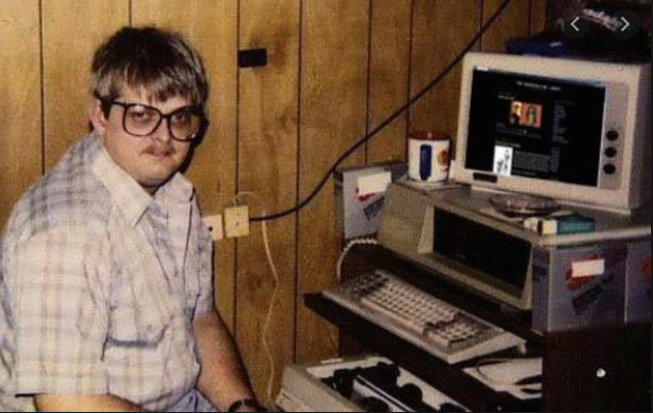
<br>
Czy w dzisiejszych czasach w branży IT jest miejsce dla kobiet?<br>
Sprawdźmy...

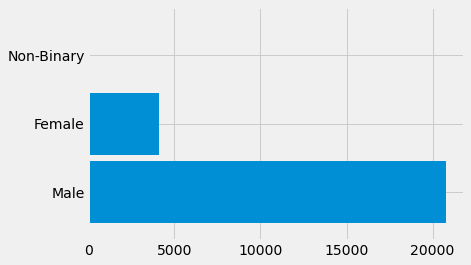

In [62]:
df['q3Gender'].value_counts()[:3].plot.barh(width=0.9)
plt.show()

Z wygenerowanego wykresu wynika, że **co piąty** programista jest **KOBIETĄ**. Zdecydowana większość to mężczyżni, jednak stereotyp programisty-mężczyzny może w tym miejscu zostać obalony i uznany jako nieprawdziwy w dzisiejszych czasach.   

## Where do you come from?

Skoro już przanalizowaliśmy dane pod kątem płci, warto dokonać analizy narodowości pracowników. <br>
Skąd pochodzą? W których krajach możemy znaleźć najwięcej programistów? 

In [84]:
countries=df['CountryNumeric2'].value_counts().to_frame()
data = [ dict(
        type = 'choropleth',
        locations = countries.index,
        locationmode = 'country names',
        z = countries['CountryNumeric2'],
        text = countries['CountryNumeric2'],
        colorscale ='Viridis',
        autocolorscale = False,
        reversescale = False,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = 'Liczba ankietowanych'),
      ) ]

layout = dict(
    title = 'Ankietowani według narodowości',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='survey-world-map')

Buuuum i mamy wynik! Zdziwieni?
Najwięcej programistów pochodzi z **INDII**. Znacząco odbiegają ilością programistów również **Stany Zjednoczone**. <br>
Dlaczego? Mam pewne podejrzenia, jednak w celu zgłebienia tematu zapraszam do dyskusji na https://www.quora.com/Why-are-there-so-many-Software-Developers-from-India

## Młode wilki czy stare koty ?

 Branża IT jest bardzo dynamiczna, nie ma w niej miejsca na rutynę czy omijanie technologicznych nowinek. <br>
 W jakim wieku są programiści? Czy na rynku dominują starsi programiści z dużym doświadczeniem, czy może młode osoby z zapałem do nauki?
 Sprawdźmy...

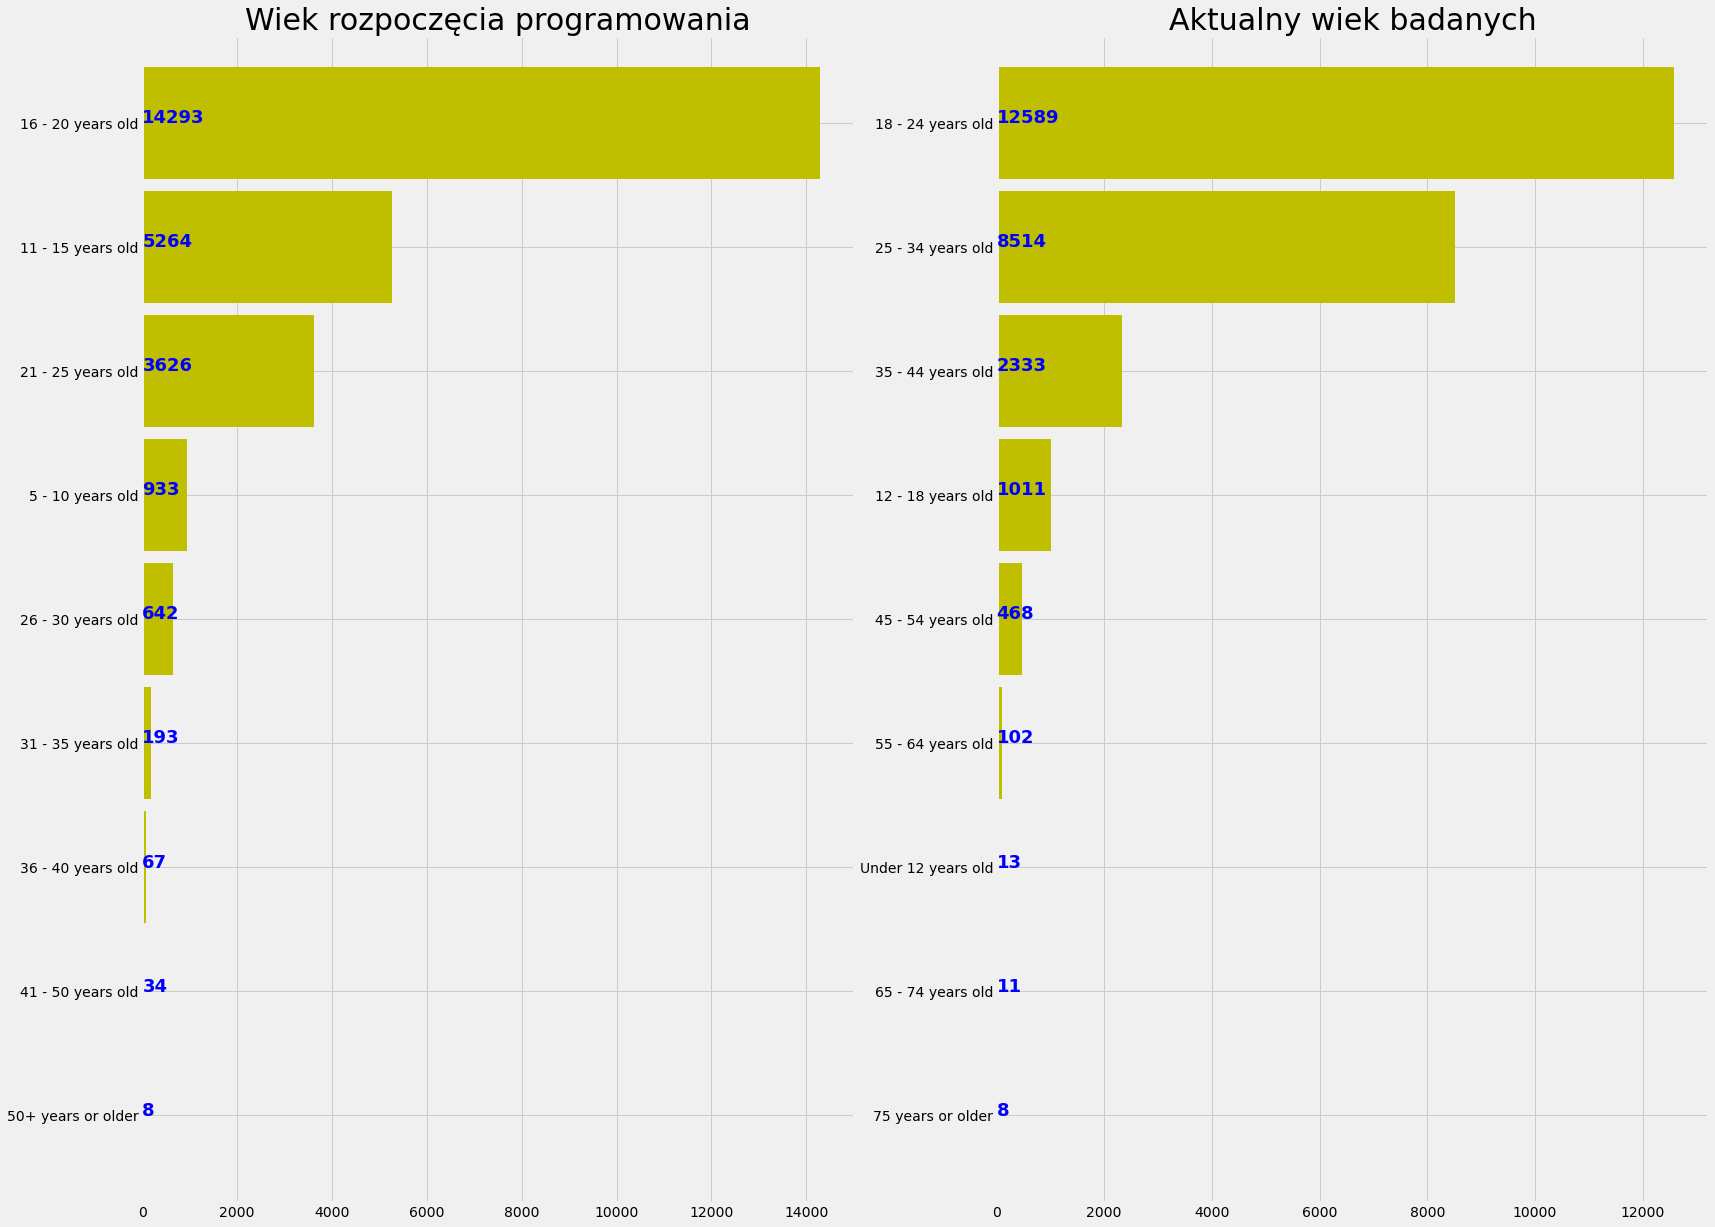

In [85]:
f,ax=plt.subplots(1,2,figsize=(25,20))
ax1=df[df['q1AgeBeginCoding']!='#NULL!'].q1AgeBeginCoding.value_counts().sort_values(ascending=True).plot.barh(width=0.9,ax=ax[0],color='y')
for i, v in enumerate(df[df['q1AgeBeginCoding']!='#NULL!'].q1AgeBeginCoding.value_counts().sort_values(ascending=True)): 
    ax1.text(.8, i, v,fontsize=18,color='b',weight='bold')
ax[0].set_title('Wiek rozpoczęcia programowania',size=30)
ax2=df[df['q2Age']!='#NULL!'].q2Age.value_counts().sort_values(ascending=True).plot.barh(width=0.9,ax=ax[1],color='y')
for i, v in enumerate(df[df['q2Age']!='#NULL!'].q2Age.value_counts().sort_values(ascending=True)): 
    ax2.text(.8, i, v,fontsize=18,color='b',weight='bold')
ax[1].set_title('Aktualny wiek badanych',size=30)
plt.show()

Wyraźnie widać, że większość respondentów należała do **grupy wiekowej (18-34 lata)**, czyli młodzi programiści z zapałem do nauki. Z wykresu wynika, że ludzie podejmują się kodowania we **wczesnym wieku (11-15 lat)**, co jest bardzo dobrą cechą. Pamiętam zapamiętanie niektórych nudnych podręczników w tym wieku... wcale nie było interesujące. Pójdźmy jednak dalej z analizą tego progblemu i sprawdźmy, jak bardzo kobiety są zaangażowane w kodowanie i w jakim wieku zaczęły je kodować...

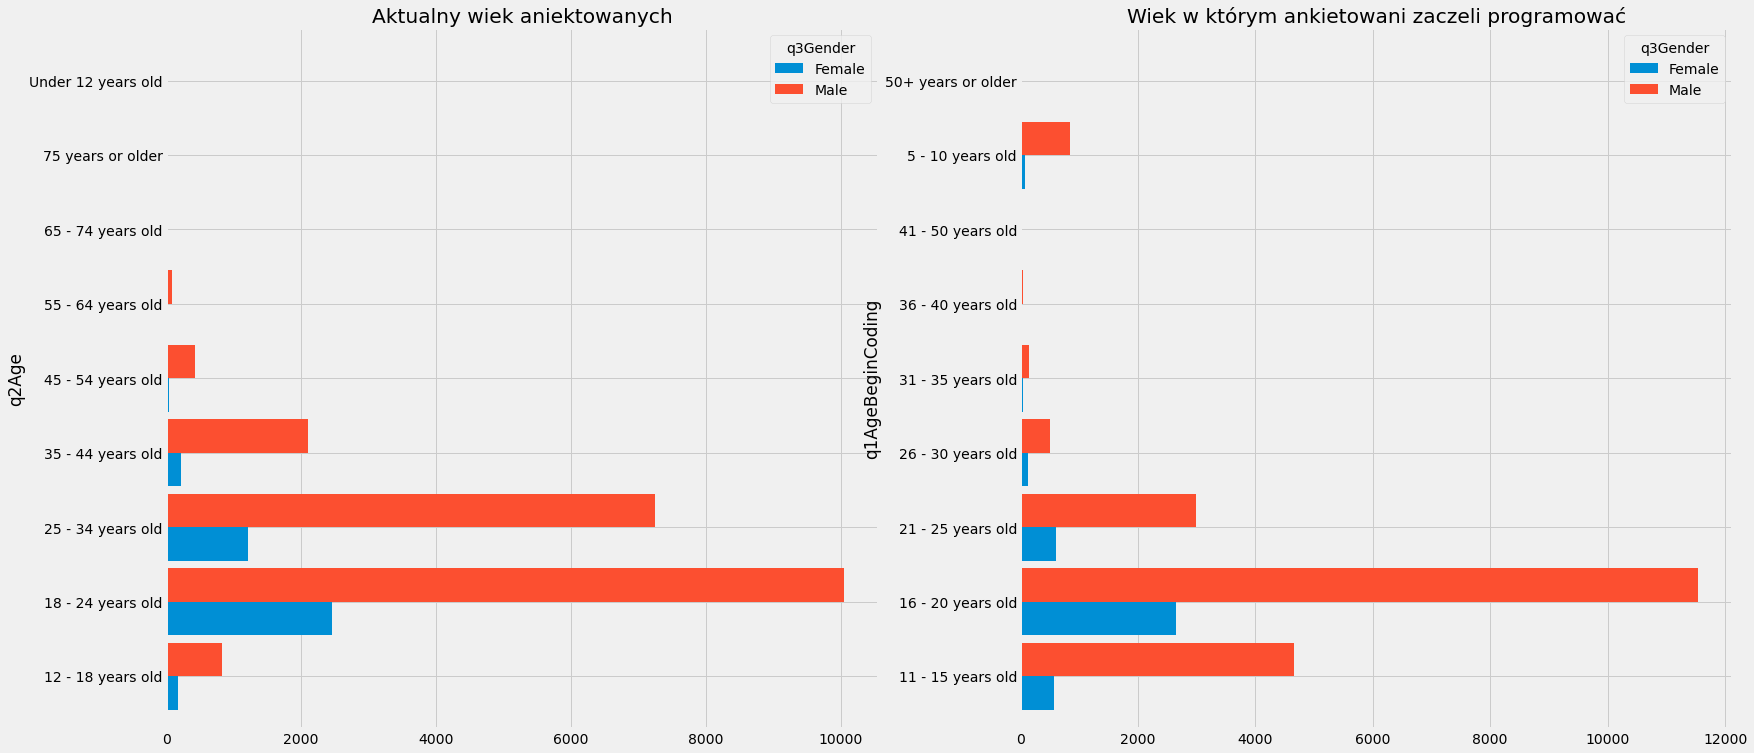

<Figure size 1080x1080 with 0 Axes>

In [86]:
f,ax=plt.subplots(1,2,figsize=(25,12))
curr_age=df[df.q3Gender.isin(['Male','Female'])].groupby(['q2Age','q3Gender'])['StartDate'].count().reset_index()
curr_age=curr_age[curr_age['q2Age']!='#NULL!']
curr_age.pivot('q2Age','q3Gender','StartDate').plot.barh(ax=ax[0],width=0.9)
ax[0].set_title('Aktualny wiek aniektowanych')
code_age=df[df.q3Gender.isin(['Male','Female'])].groupby(['q1AgeBeginCoding','q3Gender'])['StartDate'].count().reset_index()
code_age=code_age[code_age['q1AgeBeginCoding']!='#NULL!']
plt.figure(figsize=(15,15))
code_age.pivot('q1AgeBeginCoding','q3Gender','StartDate').plot.barh(ax=ax[1],width=0.9)
ax[1].set_title('Wiek w którym ankietowani zaczeli programować')
plt.subplots_adjust(hspace=0.8)
plt.show()

Powyższy wykres wydaje się być bardzo obiecujący. Dojrzałe kobiety, tj.**w przedziale wiekowym (35+)**, nie wyglądają na zagorzałych w technice. Również **większość kobiet** biorących udział w badaniu znajdowała się w grupie wiekowej **(18-34 lata), a także zaczęła kodować we wczesnym wieku. W ten sposób młodsze kobiety zaczynają zajmować się techniką, co jest pozytywną cechą.

## Dla kogo pracują deweloperzy?

Branża IT dostarcza oprogramowanie dla wielu innych gałezi przemysłu, usług itp. <br>
Warto sprawdzić w jakim sektorze pracuje najwięcej programistów

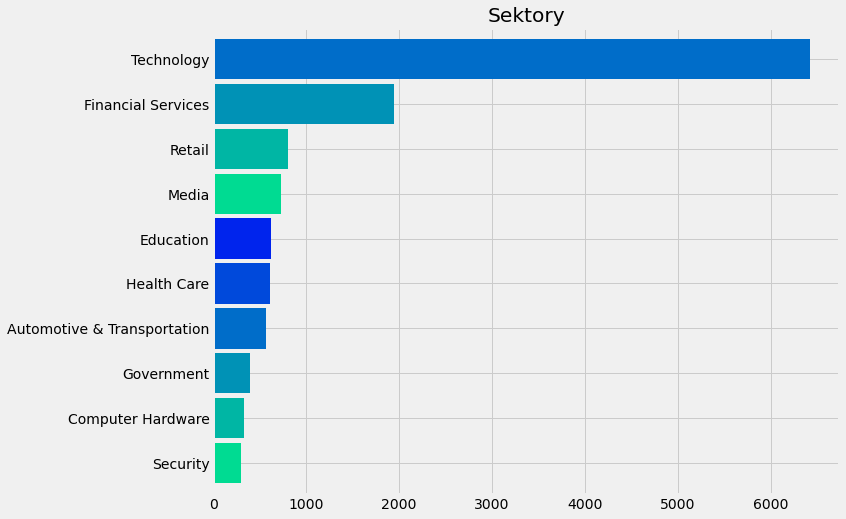

In [87]:
plt.figure(figsize=(10,8))
df[(df['q10Industry']!='#NULL!')&(df['q8Student']!='Students')].q10Industry.value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('winter_r'))
plt.title('Sektory')
plt.show()

**Około 6,5 tys.** respondentów pracuje w branży technologicznej, a następnie w usługach finansowych i handlu detalicznym. Nie brałam pod uwagę studentów**, ponieważ tak naprawdę nie pracują oni w żadnej branży. Sprawdźmy, w jakich branżach najczęściej pracują kobiety.

### Dla kogo pracują kobiety?

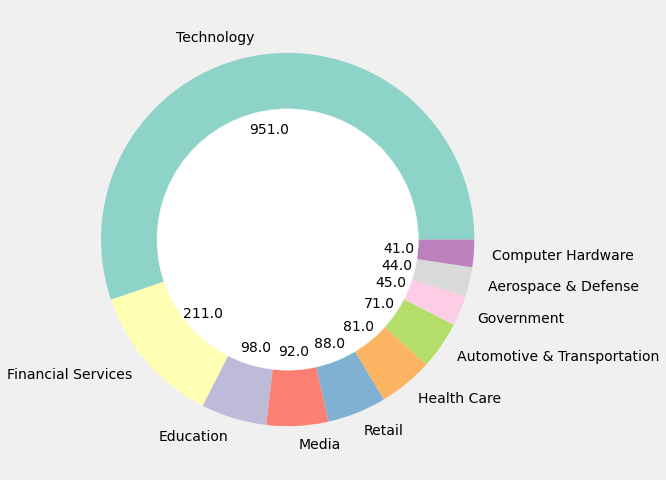

In [89]:
plt.figure(figsize=(8,8))
def absolute_value(val):
    a  = np.round(val/100.*sizes.sum(), 0)
    return a
sizes=df[(df['q3Gender']=='Female')&(df['q10Industry']!='#NULL!')&(df['q8Student']!='Students')].q10Industry.value_counts()[:10]
labels=df[(df['q3Gender']=='Female')&(df['q10Industry']!='#NULL!')&(df['q8Student']!='Students')].q10Industry.value_counts()[:10].index
plt.pie(sizes,autopct=absolute_value,labels=labels,colors=sns.color_palette('Set3',10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.gcf().gca().add_artist(my_circle)
plt.show()

Wyniki są podobne do poprzedniego wykresu. Około **50%** kobiet pracuje w przemyśle technologicznym, co jest dobrym wskaźnikiem kobiet pracujących w przemyśle technologicznym. Ale praca w firmie technologicznej nie oznacza, że dana osoba wykonuje pracę w branży technologicznej. Istnieją inne zawody, takie jak analityk biznesowy, doradca, itp., które nie są zawodami technicznymi. Zobaczmy, jakie są różne prace wykonywane przez nich.

### Kobiety i ich stanowiska

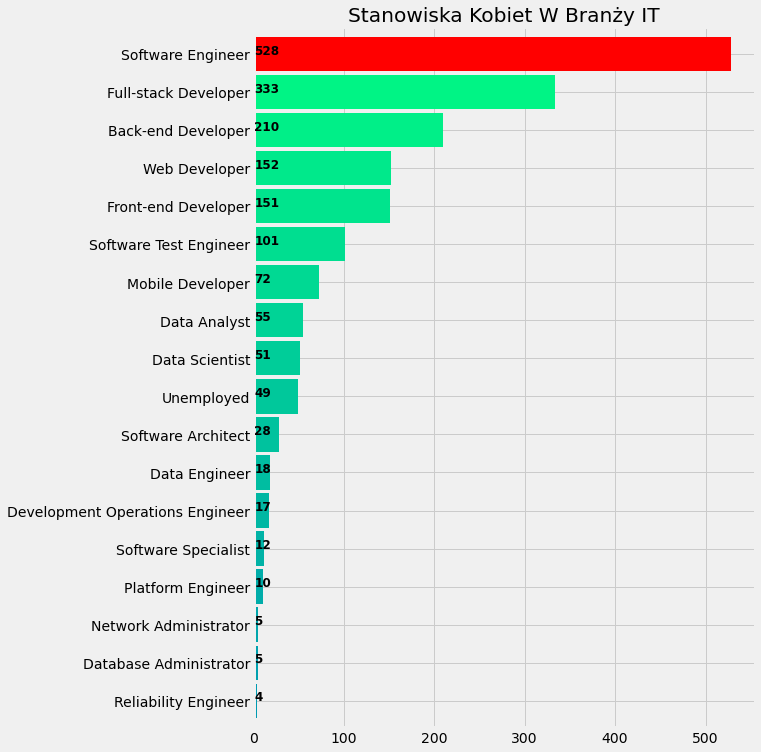

In [90]:
plt.figure(figsize=(8,12))
women_indus=df[(df['q3Gender']=='Female')&(df['q10Industry']!='#NULL!')&(df['q8Student']!='Students')]
ax=women_indus.q9CurrentRole.value_counts().plot.barh(width=0.9,color=sns.color_palette('winter_r',45))
for i, v in enumerate(women_indus.q9CurrentRole.value_counts().values): 
    ax.text(.8, i, v,fontsize=12,color='black',weight='bold')
plt.gca().invert_yaxis()
plt.title('Stanowiska Kobiet W Branży IT')
ax.patches[0].set_facecolor('r')
plt.show()

Wykres jest zaskakujący i budzi dużo pozytywnych emocji. Prawie wszystkie kobiety w branży technicznej wykonują prace techniczne, z których najwyższa to inżynierowie oprogramowania tzw.deweloperzy. Jednak liczba kobiet w **Data Science** jest bardzo mała, tylko **106**. Sprawdźmy pozycję kobiet w ich firmach.

### Juniorka czy Seniorita? 

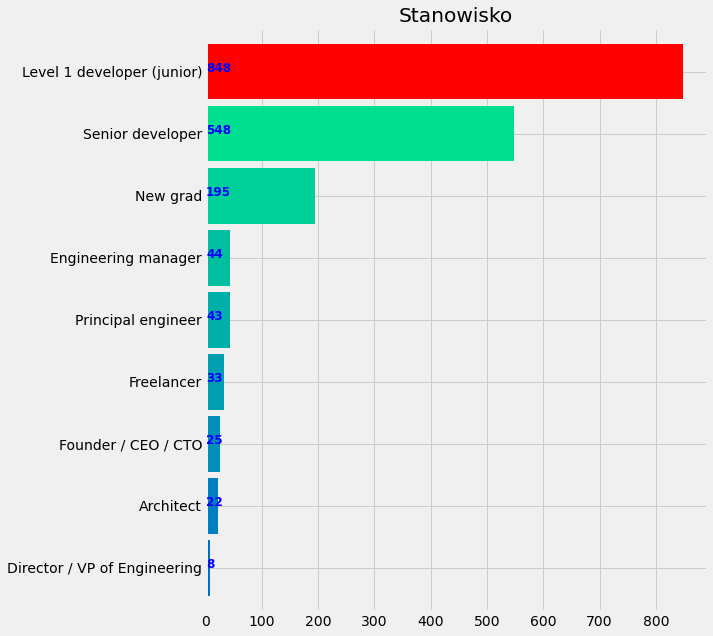

In [91]:
plt.figure(figsize=(8,10))
ax=women_indus.q8JobLevel.value_counts().plot.barh(width=0.9,color=sns.color_palette('winter_r',15))
for i, v in enumerate(women_indus.q8JobLevel.value_counts().values): 
    ax.text(.8, i, v,fontsize=12,color='blue',weight='bold')
plt.gca().invert_yaxis()
ax.patches[0].set_facecolor('r')
plt.title('Stanowisko')
plt.show()

Bardzo duża liczba kobiet jest nadal na poziomie juniorów, a niewiele z nich to CTO/VP itp. Wyniki te jednak nie są zaskakujące ponieważ, jak wcześniej widzieliśmy, większość kobiet w badaniu była młoda w przedziale wiekowym (18-24 lata), co oznacza, że dopiero rozpoczynały karierę zawodową.

### Kobol czy Machine Learning ?

Na rynku obecnie jest mnóśtwo dziedzin i technologii używanych w branży IT. Jak w 2018r. wyglądają najnowsze trendy technologiczne? <br>
Sprawdźy...

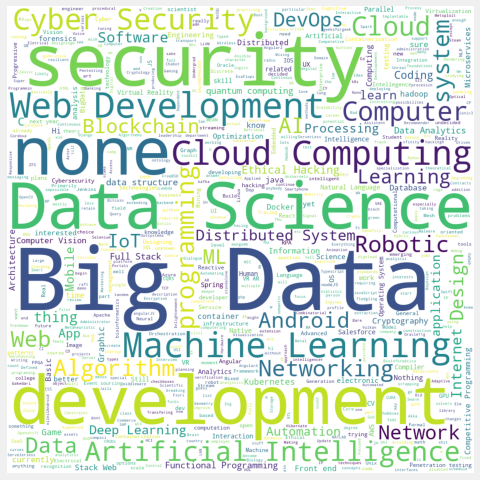

In [92]:
from wordcloud import WordCloud, STOPWORDS
plt.figure(figsize=(16,8))
wc = WordCloud(background_color="white", max_words=1000, 
               stopwords=STOPWORDS,width=1000,height=1000)
wc.generate(" ".join(df['q0027_other'].dropna()))
plt.imshow(wc)
plt.axis('off')
plt.show()


Jak widzimy **Data Science, AI, CLoud Computing i Cyber-Security** mają duży potencjał w przyszłości. Oczywiste jest, że wraz ze wzrostem ilości danych musimy je zapisywać, dlatego też potrzebujemy technologii chmur, a następnie analizowania i budowania zautomatyzowanych systemów, a do tego potrzebujemy Data Science/ML/AI oraz Security do bezpiecznego przechowywania danych i systemów. Dlatego też kandydaci rozwijający umiejętności w tych dziedzinach mają przed sobą świetlaną przyszłość.

### "Chciałbym się przebranżowić, na jaki język najlepiej??"

Takie pytanie jest zadawane kilukrotnie razy dziennie na forach internetowych. Sprawdźmy, jakie technologie są najbardziej popularne według naszego zbioru danych. 

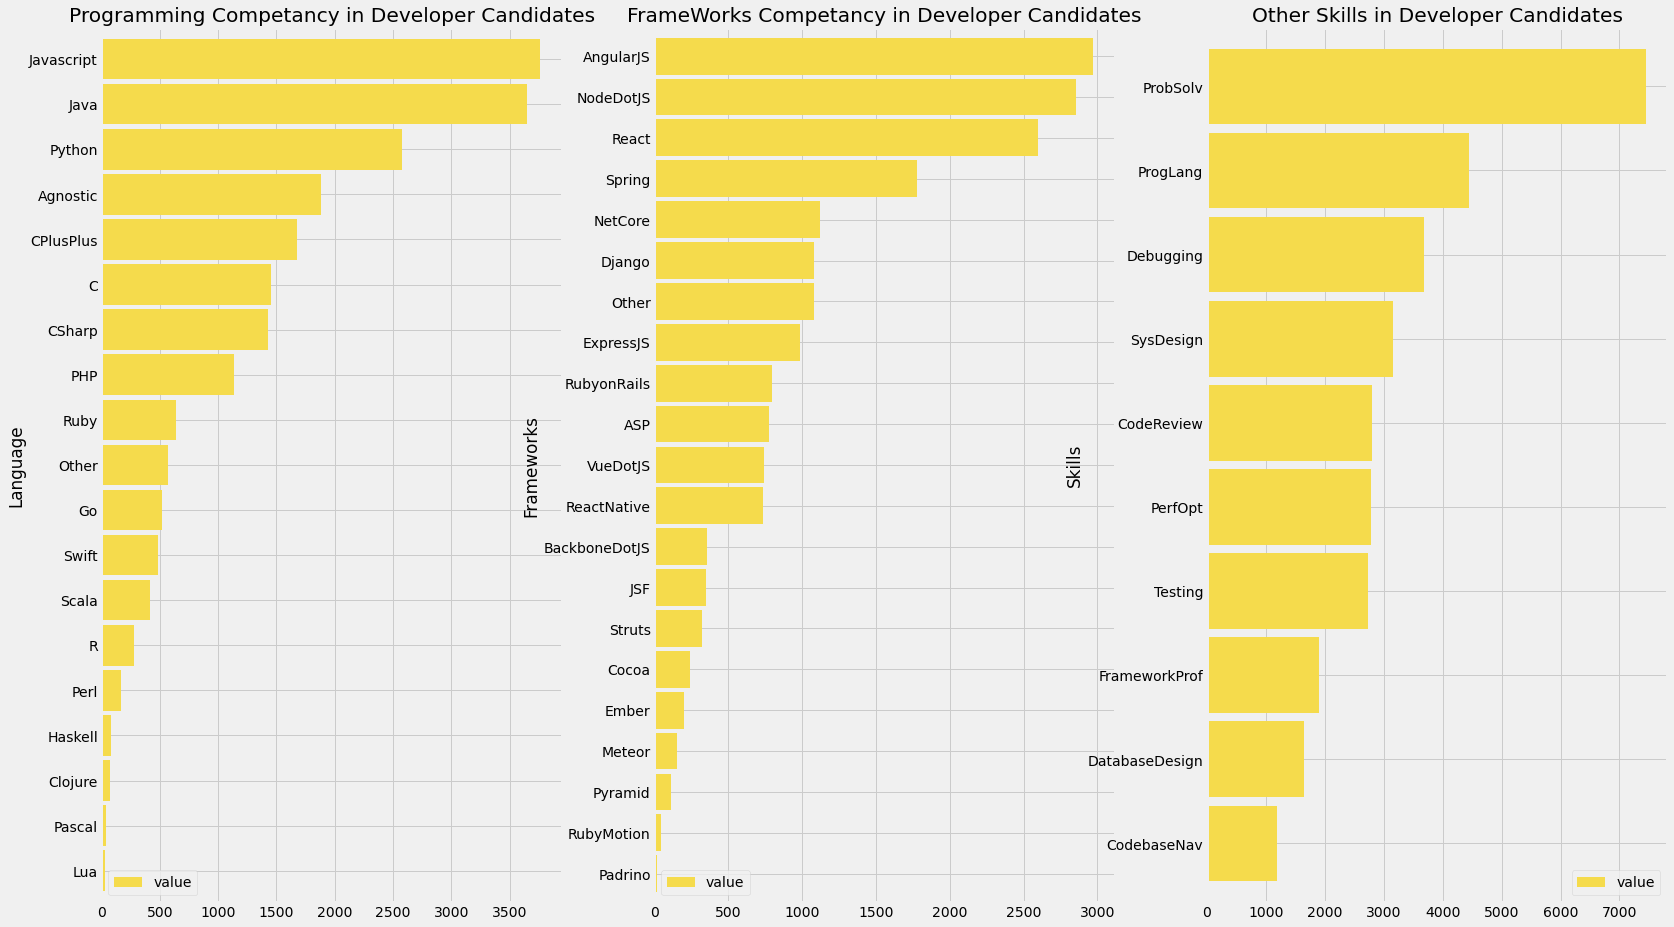

In [72]:
lang_prof=df1[df1.columns[df1.columns.str.contains('LangProf')]]
lang_prof=lang_prof.apply(pd.Series.value_counts)
lang_prof=lang_prof.melt()
lang_prof.dropna(inplace=True)
lang_prof['variable']=lang_prof['variable'].str.replace('q22LangProf','')
lang_prof.set_index('variable',inplace=True)
frame_prof=df1[df1.columns[df1.columns.str.contains('q23Frame')]]
frame_prof=frame_prof.apply(pd.Series.value_counts)
frame_prof=frame_prof.melt()
frame_prof.dropna(inplace=True)
frame_prof['variable']=frame_prof['variable'].str.replace('q23Frame','')
frame_prof.set_index('variable',inplace=True)
core_comp=df1[df1.columns[df1.columns.str.contains('CoreComp')]]
core_comp=core_comp.apply(pd.Series.value_counts)
core_comp=core_comp.melt()
core_comp.dropna(inplace=True)
core_comp['variable']=core_comp['variable'].str.replace('q21CoreComp','')
core_comp.set_index('variable',inplace=True)
f,ax=plt.subplots(1,3,figsize=(25,15))
lang_prof.sort_values(ascending=True,by='value').plot.barh(width=0.9,ax=ax[0],color=sns.color_palette('inferno_r',10))
ax[0].set_ylabel('Języki')
ax[0].set_title('Zanjomość języków programowania')
frame_prof.sort_values(ascending=True,by='value').plot.barh(width=0.9,ax=ax[1],color=sns.color_palette('inferno_r',10))
ax[1].set_ylabel('Frameworki')
ax[1].set_title('Znajomość Frameworków')
core_comp.sort_values(ascending=True,by='value').plot.barh(width=0.9,ax=ax[2],color=sns.color_palette('inferno_r',10))
ax[2].set_ylabel('Umiejętności miękkie')
ax[2].set_title('Inne umiejętności')
plt.show()

Powyższe wykresy przedstawiają umiejętności/technologie poszukiwane przez kandydatów na stanowiska kierownicze.

#### Uwagi:
 - **Java, Javascript i jego frameworki jak AngularJs i Node.js** są najbardziej poszukiwanymi umiejętnościami, które rekrutujący poszukują u ambitnych programistów.
 - Ale **Umiejętności rozwiązywania problemów** mają dużo większe znaczenie niż jakakolwiek technologia czy język. Umiejętności rozwiązywania problemów obejmują myślenie analityczne, zdolności umysłowe, ocenę i wiele innych umiejętności i są wymagane w każdej branży. Warto również pomyśleć o nauce o danych, niektórzy używają R, inni Pythona i wielu innych narzędzi. Ale to, co czyni dane naukowca wielkim, to jego umiejętności rozwiązywania problemów, a nie język programowania. 
 
 

### Miłość to czasami nienawiść... 

Pomimo, że jest dużo technologi to nie wszyscy kochają języki i framework, których używają. Wpływa na to wiele czynników, takich jak **skalowalność, łatwość uczenia się,** itp. to niektóre z tych, dzięki którym programiści albo nienawidzą albo kochają język.

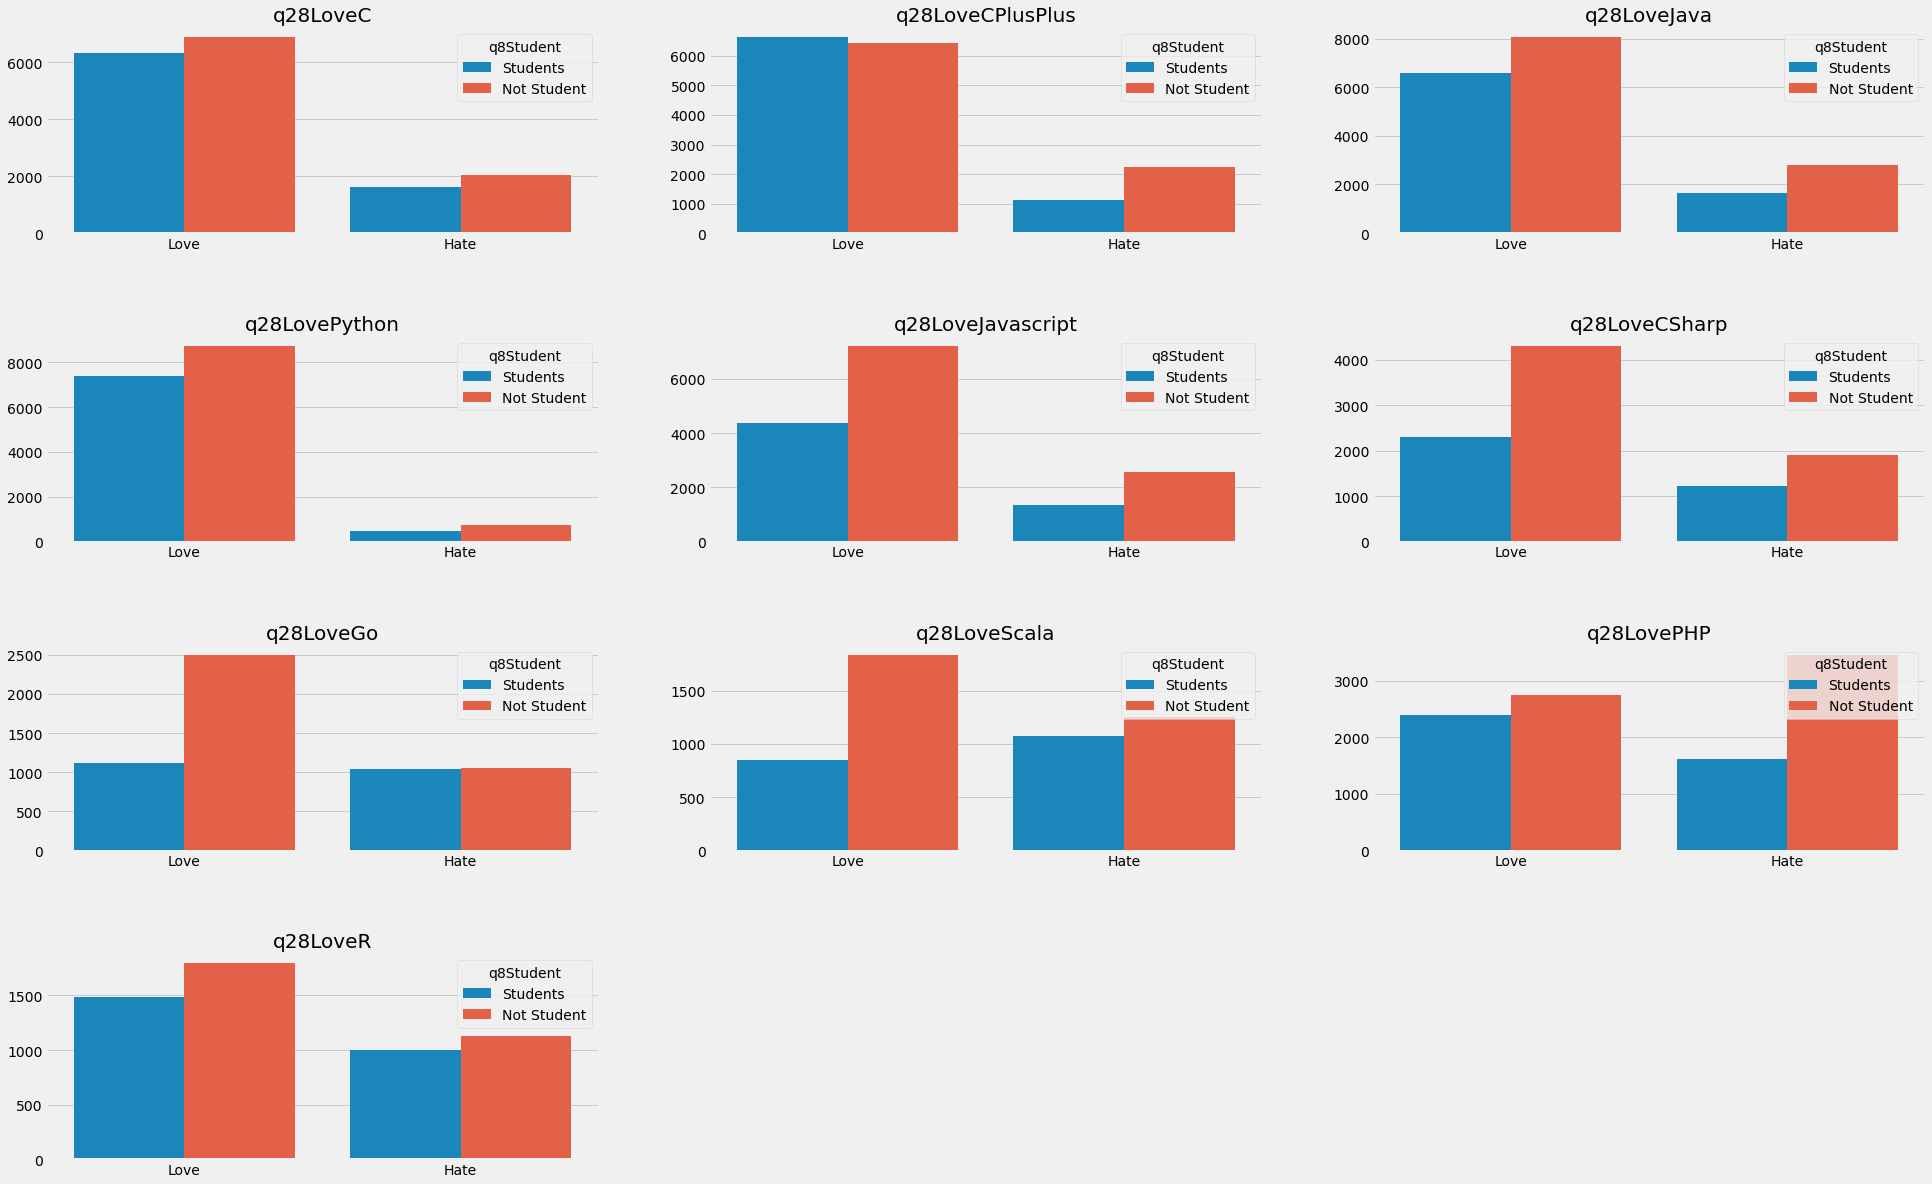

In [94]:
columns=['q28LoveC','q28LoveCPlusPlus','q28LoveJava','q28LovePython','q28LoveJavascript','q28LoveCSharp','q28LoveGo','q28LoveScala','q28LovePHP','q28LoveR']
plt.subplots(figsize=(30,30))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2+1),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    sns.countplot(i,hue='q8Student',data=df2,order=df2[i].value_counts().index)
    plt.title(i,size=20)
    plt.ylabel('')
    plt.xlabel('')
plt.show()

#### Obserwacje:

 - **Python** znów jest wyraźnym zwycięzcą, wiele osób daży go miłością, a mało osób nie nawidzi
 - Wykresy dla innych języków wyglądają podobnie, mają swoich zwolenników jak i przeciwników

### Co ludzie branży IT cenią najbardziej?

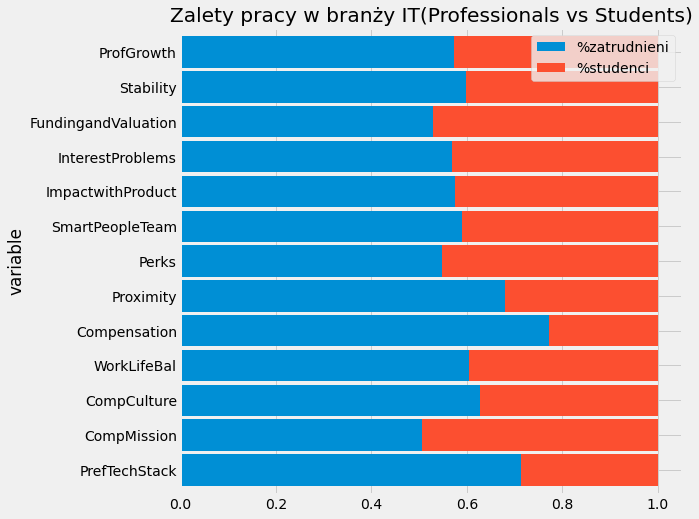

In [97]:
working=df2[df2['q8Student']=='Not Student']
working=working[working.columns[working.columns.str.contains('q12JobCrit')]]
working=working.apply(pd.Series.value_counts).melt().dropna().set_index('variable')
students=df2[df2['q8Student']=='Students']
students=students[students.columns[students.columns.str.contains('q12JobCrit')]]
students=students.apply(pd.Series.value_counts).melt().dropna().set_index('variable')
working=working[working.index!='q12JobCritOther']
stu_work=working.merge(students,left_index=True,right_index=True,how='left')
stu_work['total']=stu_work['value_x']+stu_work['value_y']
stu_work['%zatrudnieni']=stu_work['value_x']/stu_work['total']
stu_work['%studenci']=stu_work['value_y']/stu_work['total']
stu_work.drop(['value_x','value_y','total'],axis=1,inplace=True)
stu_work.index=stu_work.index.str.replace('q12JobCrit','')
stu_work.plot.barh(stacked=True,width=0.9)
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.title('Zalety pracy w branży IT(Zatrudnieni vs Studenci)')
plt.show()

Profesjonaliści są o wiele bardziej skłonni do **stabilności, bliskości biura i korzyści majątkowych**. Jest to do rozumienia, ponieważ po pewnym czasie w karierze ludzie tracą dynamizm i cieszą się spokojnym życiem. Inaczej jest w przypadku studentów, którzy jeszcze nie rozpoczęli swojej kariery zawodowej. Są więc entuzjastycznie nastawieni i gotowi nauczyć się wszystkiego, co się na nich rzuca i dlatego **misja, ocena i wyniki** są dla nich najcenniejsze.

### Skąd czerpać wiedzę 

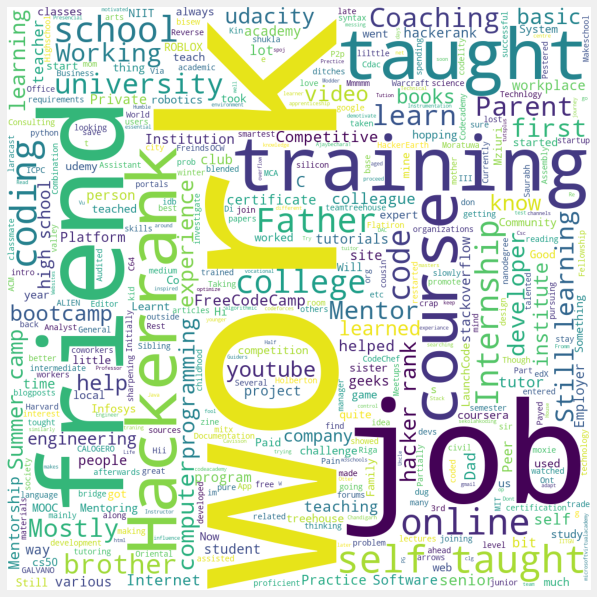

In [81]:
wc = WordCloud(background_color="white", max_words=1000, 
               stopwords=STOPWORDS,width=1000,height=1000)
wc.generate(" ".join(df['q0006_other'].dropna()))
plt.imshow(wc)
plt.axis('off')
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()


Widzimy 2 najbardziej wyróżniające się słowa **JOB i WORK**, skąd ludzie uczą się kodowania. Prawdą jest, że w trakcie naszej pracy poznajemy wiele nowych technologii i w procesie tłumaczenia i pracy z nimi, uczymy się tych rzeczy i naturalnie stajemy się lepsi w kodowaniu. Dlatego też **Doświadczenie Zawodowe** jest tak ważne, a w dzisiejszych czasach menedżerowie częściej poszukują doświadczonych osób.

### Magiczne źródła wiedzy

Niesposób wyobrazić sobie biblioteki książek, która zawierałaby dokumentacje wszystkich jezyków programowania. Skąd więc programiści najczęściej czerpią wiedzę? 

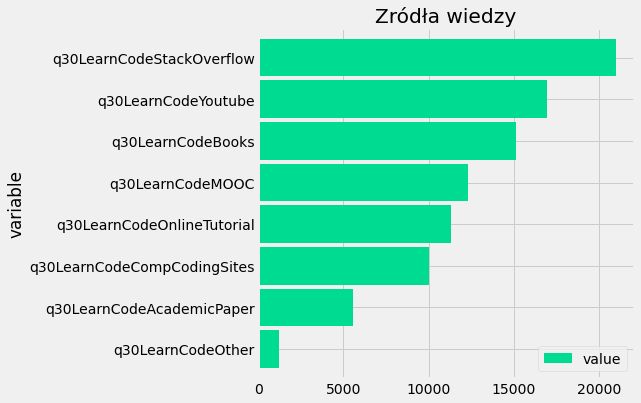

In [104]:
df[df.columns[df.columns.str.contains('q30LearnCode')]].apply(pd.Series.value_counts).melt().set_index('variable').dropna().sort_values(by='value').plot.barh(width=0.9,color=sns.color_palette('winter_r'))
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.title('Zródła wiedzy')
plt.show()

**StackOverFlow i Youtube** są najczęściej używanym medium, gdzie ludzie uczą się kodować. Jest to oczywiste, ponieważ uczymy się, pytając o swoje wątpliwości i ucząc się na błędach (stackoverflow). Przenalizujmy jeszcze jedną kolumnę, w której użytkownicy sami mogli wpisywać znane im źródła wiedzy...

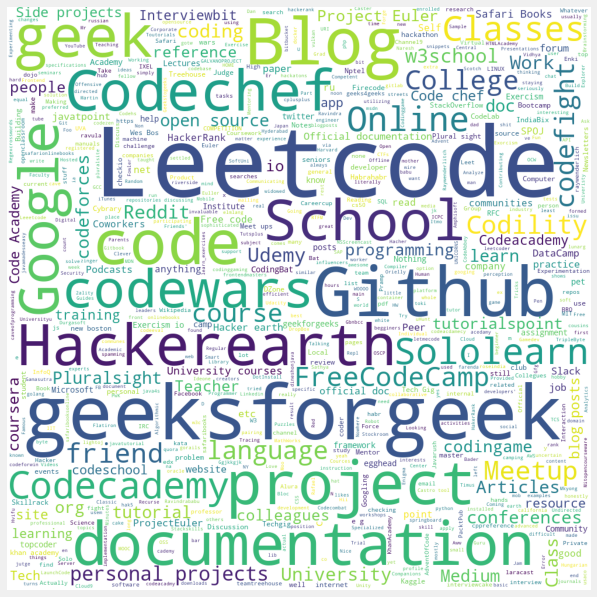

In [102]:
wc = WordCloud(background_color="white", max_words=1000, 
               stopwords=STOPWORDS,width=1000,height=1000)
wc.generate(" ".join(df['q0030_other'].dropna()))
plt.imshow(wc)
plt.axis('off')
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()


**Leetcode, Hackerearth, Codechef i geeksforgeeks** to kilka innych stron internetowych z kodowaniem, które wyglądają na bardzo sławne wśród programistów i są źródłem, z którego ludzie uczą się kodowania.

##  Wnioski :

 - Tylko około **20%** ogółu badanych stanowią **kobiety**.
 - Większość respondentów znajduje się w grupie wiekowej **(18-34)**. Dobrze też było zauważyć, że wiele osób rozpoczęło kodowanie we wczesnym stadium, tj. pomiędzy **(11-20)** rokiem życia.
 - **Specyficzne dla kobiet**:
  - Kobiety po 35 roku życia nie interesują się zbytnio techniką, co oznacza, że około 10-15 lat temu niewiele kobiet dostało się do branży technicznej. Dobrze jednak widzieć, że wiele młodych kobiet wkracza obecnie w świat techniki, a wiele z nich zaczęło kodować w młodym wieku. Tak więc w przyszłości wzrośnie liczba programistów płci żeńskiej.
  - Około **50%** wszystkich pracujących kobiet pracuje w przemyśle technologicznym, przy czym większość z nich to **Inżynierowie oprogramowania i programiści Full-Stack**. Jednak liczba kobiet w **Data Science jest bardzo mała.** Jednak stan ten może się zmienić w najbliższej przyszłości.
  - Niewiele kobiet jest na wyższym stanowisku, większość z nich to **Developerzy 1 poziomu.**

- **Realia rekrutacyjne:**
- **Java, JavaScript, AngularJs, Python i SQL** są jednymi z najczęstszych i najważniejszych umiejętności technologicznych, których poszukują rekruterzy.
 - Oprócz języków programowania, **Umiejętności rozwiązywania problemów** są najważniejszą umiejętnością, jaką powinien posiadać kandydat.
 - **Doświadczenie zawodowe i projekty** to również bardzo ważne rzeczy, których poszukują rekruterzy.
- **C,C++ i Java** są najbardziej znanymi językami dla programistów, zarówno wśród **studentów jak i osób zatrudnionych**. Jednak wielu studentów i profesjonalistów, którzy nie znają tych języków, nadal nie jest chętnych do ich nauki w porównaniu z innymi językami, takimi jak **Python, Scala i Go**. Popularność dynamicznych i funkcjonalnych języków programowania **rośnie**, a zapotrzebowanie na takie talenty z pewnością wzrośnie w przyszłości. Języki te są znane zarówno wśród studentów, jak i pracujących profesjonalistów.
- **Python jest najbardziej lubianym i najmniej znienawidzonym** językiem. To sprawia, że Python jest obowiązkowy dla prawie każdej osoby należącej do domeny technicznej.
- **Security, AI/ML/Data Science and Cloud Computing** to niektóre bardzo ważne dziedziny przyszłości.

